Workspace file to test new codes, debug, troubleshoot.

In [1]:
#!/usr/bin/env python3

"""This demo script simultaneously displays the koi fish video will writing haptic output
to the haptic display via USB. Both the video and haptic output will loop continuously
until the user presses the 'B' keyboard key.

To run, it requires both the input video and the output.txt file generated by the
visual-haptic algorithm preprocessing code."""

###### USER SETTINGS ######
FILENAME = "algo_input_data/datakoi_output_scaled.txt"
VIDEONAME = "algo_input_videos/video_koi.mp4"
SERIAL_ACTIVE = False # if False, just runs the algorithm without sending to HV switches
COM_A = "COM9" # port for MINI switches 1-10
COM_B = "COM14" # port for MINI switches 11-20
COM_C = "COM15" # port for MINI swiches 21-28

###### INITIALIZATIONS ######
import cv2
import time
import haptic_utils.haptic_map as haptic_map # my custom file
import haptic_utils.USB as USB # my custom file
import haptic_utils.algo_preprocessing as algo
from scipy.ndimage import median_filter
from numpy import genfromtxt

###### MAIN ######
# Load data
data=genfromtxt(FILENAME,delimiter=',')[:,0:28]
data_length = data.shape[0]
data_intensity = data.reshape((data_length,4,7))
data_sequence = []
for array in data_intensity: data_sequence.append(array)


In [12]:
import numpy as np
def smooth(sequence_list:np.ndarray):
    med_filt = sequence_list.copy()
    for row in range(sequence_list.shape[1]):
        for col in range(sequence_list.shape[2]):
            med_filt[:,row,col] = median_filter(sequence_list[:,row,col], 
                                            size=5, 
                                            mode='reflect', 
                                            cval=0.0, 
                                            origin=0, 
                                            axes=None)
    return med_filt

In [13]:
data_smooth = smooth(data_intensity)

In [ ]:
data_intensity()

In [8]:
import matplotlib.pyplot as plt

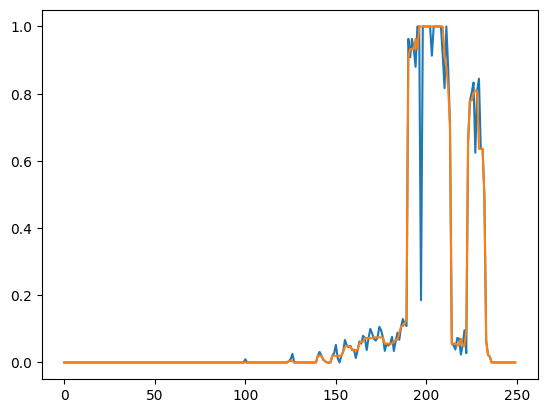

In [15]:
plt.plot(data_intensity[500:750,3,3])
plt.plot(data_smooth[500:750,3,3])